In [7]:
# Import datasets & libraries
from keras.datasets import cifar100
import matplotlib.pyplot as plt
import numpy as np

# 1. Exploring the CIFAR-100 Dataset

In [8]:
# Download dataset of CIFAR-100
(x_train, y_train), (x_test, y_test) = cifar100.load_data()

# Check the shape of the array
print(f"x_train shape: {x_train.shape}")
print(f"y_train shape: {y_train.shape}")
print(f"x_test shape: {x_test.shape}")
print(f"y_test shape: {y_test.shape}")

# Number of samples in dataset
print(f"Train: {x_train.shape[0]}")
print(f"Test: {x_test.shape[0]}")

# Data format
print(type(x_train))
print(type(y_train))

x_train shape: (50000, 32, 32, 3)
y_train shape: (50000, 1)
x_test shape: (10000, 32, 32, 3)
y_test shape: (10000, 1)
Train: 50000
Test: 10000
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>


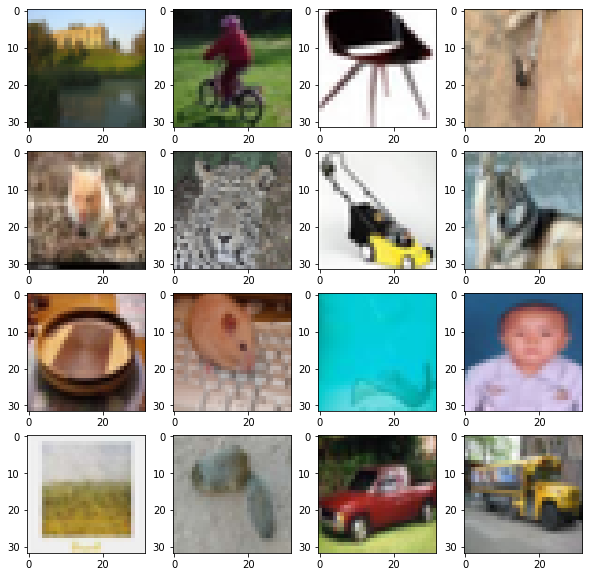

In [9]:
# Show randomly 16 images in the CIFAR-100
plt.figure(figsize=(10, 10))
for i in range (16):
  rand_num = np.random.randint(0, 50000)
  cifar_img = plt.subplot(4,4, i+1)
  plt.imshow(x_train[rand_num])

# 2. Preprocessing for CIFAR-100 dataset

In [10]:
# Import libraries for preprocessing images
from tensorflow.keras.utils import to_categorical

# Normalize images
train_images = x_train.astype('float32')/255
test_images = x_test.astype('float32')/255

# Transform labels to one hot encoding
train_labels = to_categorical(y_train)
test_labels = to_categorical(y_test)

# 3. Build CNN models for classification task

In [11]:
# Import Libraries for CNN
from keras.models import Sequential
from keras.layers import MaxPooling2D, Conv2D, Flatten, Dense, Activation, Dropout

In [6]:
# Plot function for visualisation training process
import matplotlib.pyplot as plt

def training_plot(history):
  acc = history.history['acc']
  val_acc = history.history['val_acc']
  loss = history.history['loss']
  val_loss = history.history['val_loss']
  epochs = range(1, len(acc) + 1)
  plt.plot(epochs, acc, 'bo', label='Training acc')
  plt.plot(epochs, val_acc, 'b', label='Validation acc')
  plt.title('Training and validation accuracy')
  plt.legend()
  plt.figure()
  plt.plot(epochs, loss, 'bo', label='Training loss')
  plt.plot(epochs, val_loss, 'b', label='Validation loss')
  plt.title('Training and validation loss')
  plt.legend()
  plt.show()

## CNN with Batch norm model

In [12]:
# Batch norm model 4
from keras.models import Sequential
from keras.layers.convolutional import Conv2D
from keras.layers.pooling import MaxPool2D
from keras.layers.core import Dense,Activation,Dropout,Flatten

from tensorflow.keras.layers import BatchNormalization
from tensorflow.keras.initializers import RandomNormal, Constant
model = Sequential()
 
model.add(Conv2D(256,(3,3),padding='same',input_shape=(32,32,3)))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Conv2D(256,(3,3),padding='same'))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Dropout(0.2))
 
model.add(Conv2D(512,(3,3),padding='same'))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Conv2D(512,(3,3),padding='same'))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Dropout(0.2))

model.add(Conv2D(512,(3,3),padding='same'))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Conv2D(512,(3,3),padding='same'))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Dropout(0.2))

model.add(Conv2D(512,(3,3),padding='same'))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Conv2D(512,(3,3),padding='same'))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Dropout(0.2))

model.add(Flatten())
model.add(Dense(1024))
model.add(Activation('relu'))
model.add(Dropout(0.2))
model.add(BatchNormalization(momentum=0.95, 
        epsilon=0.005,
        beta_initializer=RandomNormal(mean=0.0, stddev=0.05), 
        gamma_initializer=Constant(value=0.9)))
model.add(Dense(100,activation='softmax'))
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 32, 32, 256)       7168      
_________________________________________________________________
batch_normalization (BatchNo (None, 32, 32, 256)       1024      
_________________________________________________________________
activation (Activation)      (None, 32, 32, 256)       0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 32, 32, 256)       590080    
_________________________________________________________________
batch_normalization_1 (Batch (None, 32, 32, 256)       1024      
_________________________________________________________________
activation_1 (Activation)    (None, 32, 32, 256)       0         
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 16, 16, 256)       0

In [13]:
# Data Augmentation
# Adding data augmentation for creating more images
# Divide train and validation set 
from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Configuration for creating new images
train_datagen = ImageDataGenerator(
    rotation_range=20,
    horizontal_flip=True,
)

X_train, X_validation, y_train, y_validation = train_test_split(train_images, train_labels, test_size=0.2, random_state=93)
train_datagen.fit(X_train)

In [14]:
# Configure the model for training
from tensorflow.keras import optimizers
model.compile(loss='categorical_crossentropy',
              optimizer=optimizers.RMSprop(learning_rate=1e-4),
              metrics=['acc'])

In [16]:
# Training model
import time
training_start = time.time()
history = model.fit(train_datagen.flow(X_train, y_train, batch_size=64),
          steps_per_epoch=5, 
          epochs=1,
          validation_data=(X_validation, y_validation),
          verbose=1)
training_stop = time.time()
training_time = training_stop - training_start
print(f"Training time: {training_time}")

5/5 [==============================] - 250s 50s/step - loss: 5.1645 - acc: 0.0156 - val_loss: 4.6295 - val_acc: 0.0118
Training time: 254.562077999115


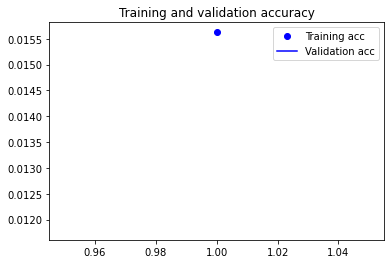

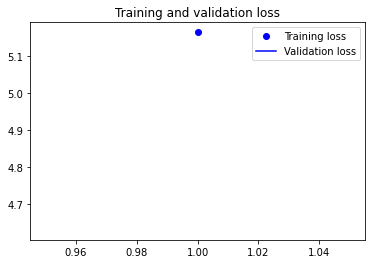

In [17]:
# Visualize training process
training_plot(history)

In [18]:
scores = model.evaluate(test_images, test_labels)
print(f'accuracy on test set: {model.metrics_names[1]} of {scores[1]*100}')

313/313 [==============================] - 227s 727ms/step - loss: 4.6299 - acc: 0.0110
accuracy on test set: acc of 1.0999999940395355


In [19]:
# Translate categorial to array for drawing confusion matrix
from sklearn.metrics import confusion_matrix
from numpy import argmax
prediction = []
true_labels = []

pred = model.predict(test_images)
print(test_labels.shape[0])
for i in range(test_labels.shape[0]):
  prediction.append(argmax(pred[i]))
  true_labels.append(argmax(test_labels[i]))

cm = confusion_matrix(prediction, true_labels)

10000


In [20]:
# Name of all classes in CIFAR-100
classes = ['beaver', 'dolphin', 'otter', 'seal', 'whale', 
'aquarium' ,'fish', 'ray', 'shark', 'trout', 
'orchids', 'poppies', 'roses', 'sunflowers', 'tulips', 
'bottles', 'bowls', 'cans', 'cups', 'plates', 
'apples', 'mushrooms', 'oranges', 'pears', 'sweet peppers', 
'clock', 'computer keyboard', 'lamp', 'telephone', 'television', 'bed', 'chair', 'couch', 'table', 'wardrobe', 
'bee', 'beetle', 'butterfly', 'caterpillar', 'cockroach', 
'bear', 'leopard', 'lion', 'tiger', 'wolf', 
'bridge', 'castle', 'house', 'road', 'skyscraper', 
'cloud', 'forest', 'mountain', 'plain', 'sea', 
'camel', 'cattle', 'chimpanzee', 'elephant', 'kangaroo', 
'fox', 'porcupine', 'possum', 'raccoon', 'skunk', 
'crab', 'lobster', 'snail', 'spider', 'worm', 
'baby', 'boy', 'girl', 'man', 'woman', 
'crocodile', 'dinosaur', 'lizard', 'snake', 'turtle', 
'hamster', 'mouse', 'rabbit', 'shrew', 'squirrel', 
'maple', 'oak', 'palm', 'pine', 'willow', 
'bicycle', 'bus', 'motorcycle', 'pickup truck', 'train', 
'lawn-mower', 'rocket', 'streetcar', 'tank', 'tractor']

[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


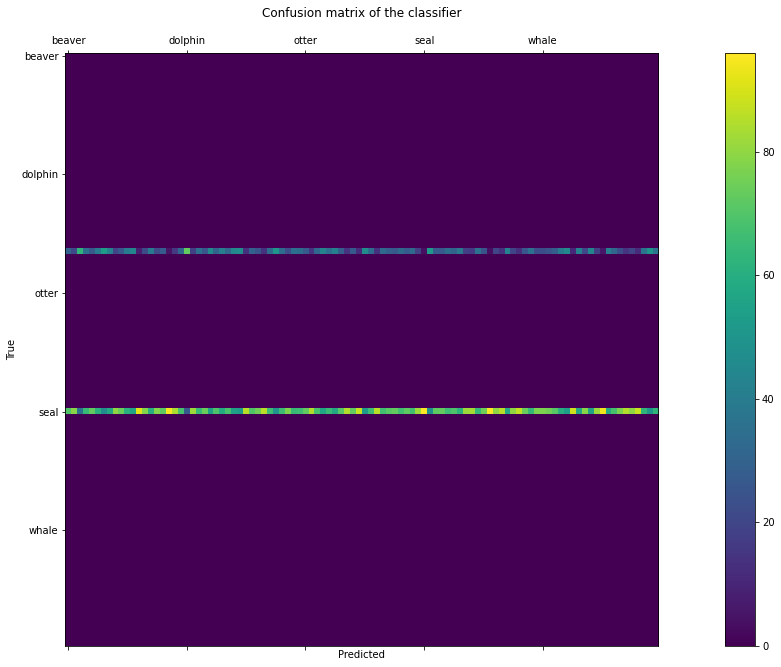

In [21]:
# Plot the confusion matrix
import matplotlib.pyplot as plt
print(cm)
fig = plt.figure(figsize=(24,24))
ax = fig.add_subplot(211)
cax = ax.matshow(cm)
plt.title('Confusion matrix of the classifier')
fig.colorbar(cax)
ax.set_xticklabels([''] + classes)
ax.set_yticklabels([''] + classes)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

In [22]:
# Calculating f1 score
from sklearn.metrics import f1_score
print(f"f1 score: {f1_score(true_labels, prediction, average='weighted')}")

f1 score: 0.0003603347472199931


In [23]:
from sklearn.metrics import classification_report
print(classification_report(true_labels, prediction, target_names=classes, digits=5))

                   precision    recall  f1-score   support

           beaver    0.00000   0.00000   0.00000       100
          dolphin    0.00000   0.00000   0.00000       100
            otter    0.00000   0.00000   0.00000       100
             seal    0.00000   0.00000   0.00000       100
            whale    0.00000   0.00000   0.00000       100
         aquarium    0.00000   0.00000   0.00000       100
             fish    0.00000   0.00000   0.00000       100
              ray    0.00000   0.00000   0.00000       100
            shark    0.00000   0.00000   0.00000       100
            trout    0.00000   0.00000   0.00000       100
          orchids    0.00000   0.00000   0.00000       100
          poppies    0.00000   0.00000   0.00000       100
            roses    0.00000   0.00000   0.00000       100
       sunflowers    0.00000   0.00000   0.00000       100
           tulips    0.00000   0.00000   0.00000       100
          bottles    0.00000   0.00000   0.00000       

C:\Users\akint\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
